# Machine Learning I - Practical I

Name: {Simon, Jan and Eilya}

Course: {Machiene Learning}

This notebook provides you with the assignments and the overall code structure you need to complete the assignment. There are also questions that you need to answer in text form. Please use full sentences and reasonably correct spelling/grammar.

Regarding submission & grading:

- Work in groups of two or three and hand in your solution as a group.

- Solutions need to be uploaded to StudIP until the submission date indicated in the course plan. Please upload a copy of this notebook and a PDF version of it after you ran it.

- Solutions need to be presented to tutors in tutorial. Presentation dates are listed in the course plan. Every group member needs to be able to explain everything.

- You have to solve N-1 practicals to get admission to the exam.

- For plots you create yourself, all axes must be labeled. 

- Do not change the function interfaces.

In [55]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
plt.rcParams['figure.dpi'] = 150

## The  dataset

The dataset consists of over 20.000 materials and lists their physical features. From these features, we want to learn how to predict the critical temperature, i.e. the temperature we need to cool the material to so it becomes superconductive. First load and familiarize yourself with the data set a bit.

In [56]:
data = pd.read_csv('superconduct_train.csv')
print(data.shape)

(21263, 82)


In [57]:
data.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

Because the dataset is rather large, we prepare a small subset of the data as training set, and another subset as test set. To make the computations reproducible, we set the random seed.

In [58]:
target_clm = 'critical_temp'  # the critical temperature is our target variable
n_trainset = 200  # size of the training set
n_testset = 500  # size of the test set

In [59]:
# set random seed to make sure every test set is the same
np.random.seed(seed=1)

idx = np.arange(data.shape[0])
idx_shuffled = np.random.permutation(idx)  # shuffle indices to split into training and test set

test_idx = idx_shuffled[:n_testset]
train_idx = idx_shuffled[n_testset:n_testset+n_trainset]
train_full_idx = idx_shuffled[n_testset:]

X_test = data.loc[test_idx, data.columns != target_clm].values
y_test = data.loc[test_idx, data.columns == target_clm].values
print('Test set shapes (X and y)', X_test.shape, y_test.shape)

X_train = data.loc[train_idx, data.columns != target_clm].values
y_train = data.loc[train_idx, data.columns == target_clm].values
print('Small training set shapes (X and y):', X_train.shape, y_train.shape)

X_train_full = data.loc[train_full_idx, data.columns != target_clm].values
y_train_full = data.loc[train_full_idx, data.columns == target_clm].values
print('Full training set shapes (X and y):', X_train_full.shape, y_train_full.shape)

Test set shapes (X and y) (500, 81) (500, 1)
Small training set shapes (X and y): (200, 81) (200, 1)
Full training set shapes (X and y): (20763, 81) (20763, 1)


## Task 1: Plot the dataset

To explore the dataset, use `X_train_full` and `y_train_full` for two descriptive plots:

* **Histogram** of the target variable. Use `plt.hist`.

* **Scatterplots** relating the target variable to one of the feature values. For this you will need 81 scatterplots. Arrange them in one big figure with 9x9 subplots. Use `plt.scatter`. You may need to adjust the marker size and the alpha blending value. 

Furthermore, we need to normalize the data, such that each feature has a mean of zero mean and a variance of one. Implement a function `normalize` which normalizes the data. Print the means and standard variation of the first five features before and after.

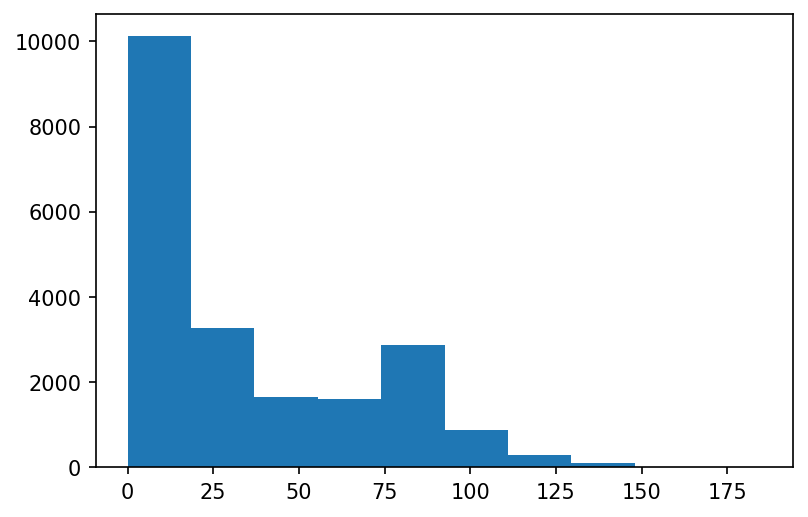

In [60]:
# Histogram of the target variable
plt.hist(y_train_full)
plt.show()

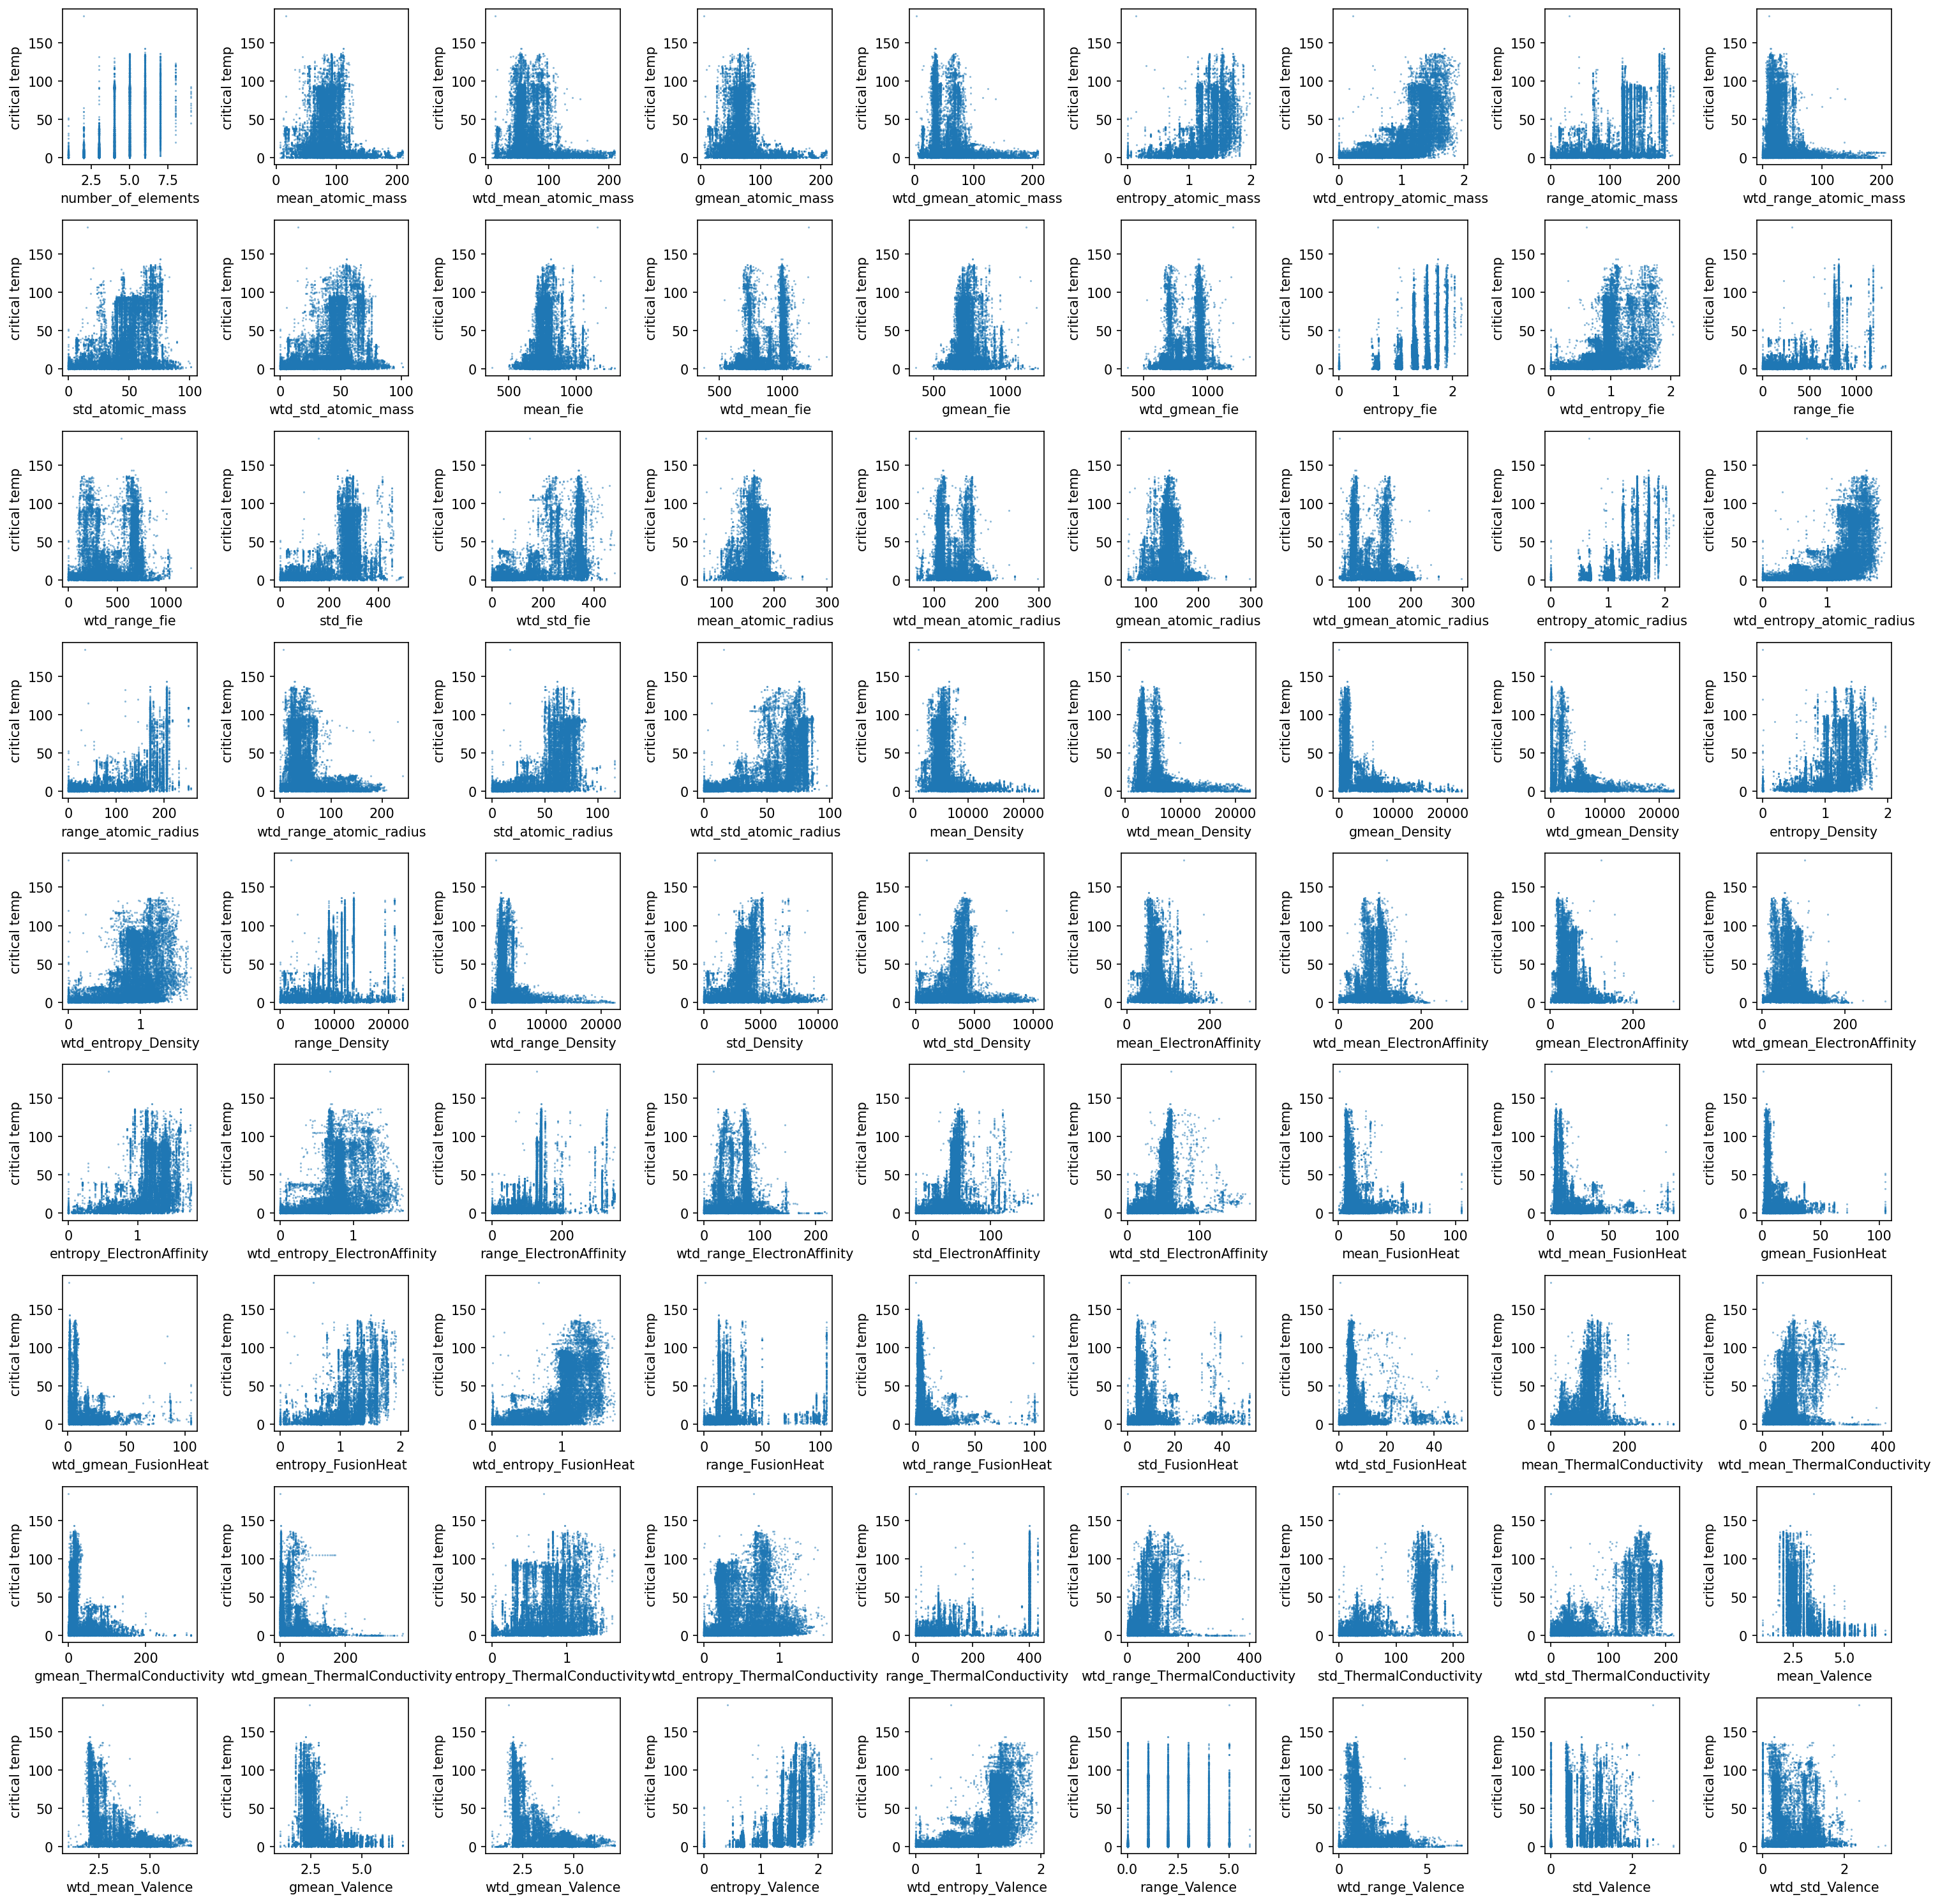

In [61]:
# Scatter plots of the target variable vs. features
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 150
fig, axs = plt.subplots(9,9)

axs = [axs[i][j] for i in range(9) for j in range(9)]
for i in range(81):
        axs[i].scatter(X_train_full[:,i],y_train_full,alpha=0.5, s=1, marker='.')
        axs[i].set_xlabel(f'{list(data.columns)[i]}', fontsize=10)
        axs[i].set_ylabel(f'critical temp', fontsize=10)
fig.tight_layout()
plt.show()

In [62]:
# Normalize
def normalize(data, verbose=False):
    mean = sum(data)/data.size
    if verbose: print("Mean before: ", mean)
    new_data = data-mean
    std_devi = np.sqrt(sum(np.square(new_data))/data.size)
    if verbose: print ("Standard deviatin before: ", std_devi)
    factor = 1/std_devi
    final_data = np.multiply(new_data,factor)
    if verbose: print("Mean after: ", sum(final_data)/final_data.size)
    if verbose: print("Standard deviatin after: ", np.sqrt(sum(np.square(final_data-(sum(final_data)/final_data.size)))/final_data.size))
    return final_data


for i in range(5): 
    print("Property: ", list(data.columns)[i])
    normalize(X_train_full[:,i], verbose=True)
    print()

# y_train = normalize(y_train)
# y_test = normalize(y_test)

# Normalize the input data not the targets (critical temps)
for i in range(81):
   X_train_full[:,i] = normalize(X_train_full[:,i])
   X_train[:,i] = normalize(X_train[:,i])
   X_test[:,i] = normalize(X_test[:,i])




Property:  number_of_elements
Mean before:  4.112218850840438
Standard deviatin before:  1.4396048331711424
Mean after:  -7.377959492259264e-17
Standard deviatin after:  0.9999999999998995

Property:  mean_atomic_mass
Mean before:  87.60808136584046
Standard deviatin before:  29.702997335967265
Mean after:  -5.5809064819184594e-14
Standard deviatin after:  0.9999999999999883

Property:  wtd_mean_atomic_mass
Mean before:  73.04988360343039
Standard deviatin before:  33.56235884855749
Mean after:  4.313186774139394e-15
Standard deviatin after:  0.9999999999999999

Property:  gmean_atomic_mass
Mean before:  71.34256083274731
Standard deviatin before:  31.075554104235337
Mean after:  -1.8580731346867462e-14
Standard deviatin after:  1.0000000000000075

Property:  wtd_gmean_atomic_mass
Mean before:  58.6033566064306
Standard deviatin before:  36.732085658100964
Mean after:  2.709892224887511e-15
Standard deviatin after:  1.0000000000000027



Which material properties may be useful for predicting superconductivity? What other observations can you make?

None of the properties are on the first sight exlpictily correlated to the critical temperatue. Even when ther is a slope  in the data, there still exiisting dozens of data points in vertical lines. Hence it is not clear which crticial temp is there the "right" one. Therfeoe we will use all of the data, to get a corealation we cant see, looking only at it in one dimension side by side.

## Task 2:  Implement your own OLS estimator

We want to use linear regression to predict the critical temperature. Implement the ordinary least squares estimator without regularization 'by hand':

$w = (X^TX)^{-1}X^Ty$

To make life a bit easier, we provide a function that can be used to plot regression results. In addition it computes the mean squared error and the squared correlation between the true and predicted values. 

In [63]:
def plot_regression_results(y_test, y_pred, weights):
    '''Produces three plots to analyze the results of linear regression:
        -True vs predicted
        -Raw residual histogram
        -Weight histogram

    Inputs:
        y_test: (n_observations,) numpy array with true values
        y_pred: (n_observations,) numpy array with predicted values
        weights: (n_weights) numpy array with regression weights'''

    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('r^2: ', r2_score(y_test, y_pred))

    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    # predicted vs true
    ax[0].scatter(y_test, y_pred)
    ax[0].set_title('True vs. Predicted')
    ax[0].set_xlabel('True %s' % (target_clm))
    ax[0].set_ylabel('Predicted %s' % (target_clm))

    # residuals
    error = np.squeeze(np.array(y_test)) - np.squeeze(np.array(y_pred))
    ax[1].hist(np.array(error), bins=30)
    ax[1].set_title('Raw residuals')
    ax[1].set_xlabel('(true-predicted)')

    # weight histogram
    ax[2].hist(weights, bins=30)
    ax[2].set_title('weight histogram')

    plt.tight_layout()

As an example, we here show you how to use this function with random data. 

MSE:  2640.432578444892
r^2:  -1.108062856115481


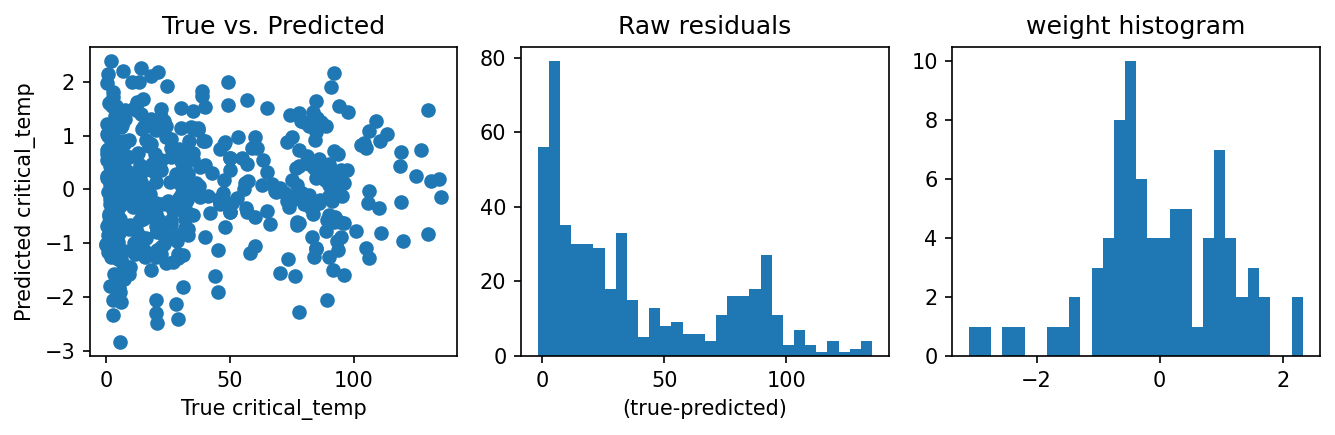

In [64]:
# weights is a vector of length 82: the first value is the intercept (beta0), then 81 coefficients
weights = np.random.randn(82)

# Model predictions on the test set
y_pred_test = np.random.randn(y_test.size)

plot_regression_results(y_test, y_pred_test, weights)

Implement OLS linear regression yourself. Use `X_train` and `y_train` for estimating the weights and compute the MSE and $r^2$ from `X_test`. When you call our plotting function with the regession result, you should get mean squared error of 707.8.

In [65]:
def OLS_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations 200, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------
    # Offset ones
    X_train = np.append(X_train, np.ones((X_train.shape[0],1)), axis=1)
    X_test = np.append(X_test, np.ones((X_test.shape[0],1)), axis=1)

    weights = np.dot(np.linalg.pinv(X_train),y_train)

    y_pred = np.dot(X_test, weights)
    # ---------------- END CODE -------------------------

    return weights, y_pred

MSE:  707.8008845060007
r^2:  0.434907459355935


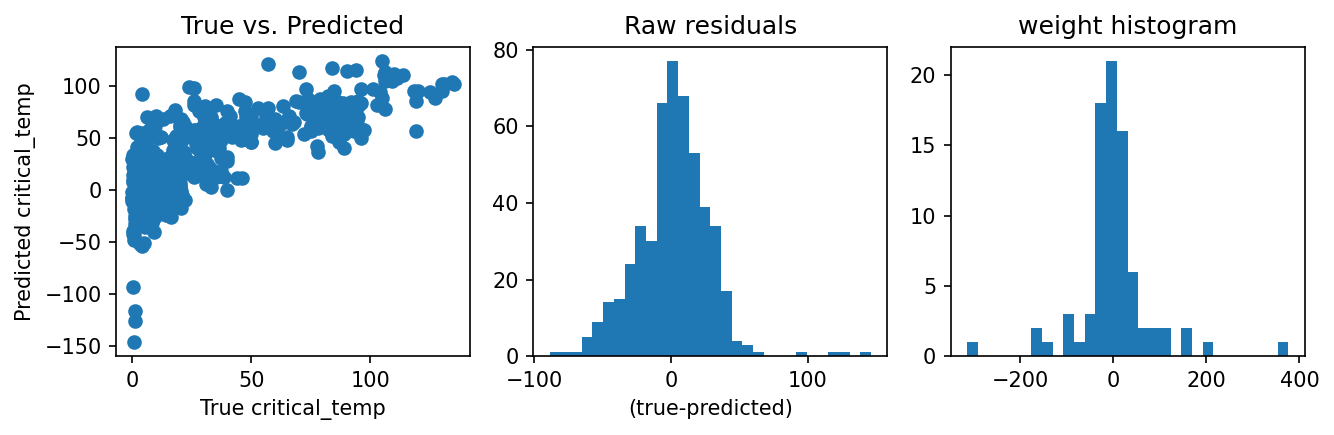

In [66]:
# Plots of the results
weights, y_pred = OLS_regression(X_test,X_train,y_train)
plot_regression_results(y_test, y_pred, weights)

What do you observe? Is the linear regression model good?

Better than random, in first plot points should allign on normal axis. They do this a bit, but not too good. Some points are realy far away from the true temperatuter. Also there are negative predicted temperatures, which is physicaly incorrect. The weight histogram shows that most coeficinets are zero and some are realy big, which is not reasonable for a model of the real world.


## Task 3: Compare your implementation to sklearn

Now, familarize yourself with the sklearn library. In the section on linear models:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

you will find `sklearn.linear_model.LinearRegression`, the `sklearn` implementation of the OLS estimator. Use this sklearn class to implement OLS linear regression. Again obtain estimates of the weights on `X_train` and `y_train` and compute the MSE and $r^2$ on `X_test`.


In [67]:
def sklearn_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization using the sklearn library on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------

    reg = linear_model.LinearRegression().fit(X_train,y_train) 
    weights = reg.coef_.reshape((81,1))
    y_pred = reg.predict(X_test)
    print("score: ",reg.score(X_train,y_train))

    # ---------------- END CODE -------------------------

    return weights, y_pred

score:  0.8394074704916044
MSE:  707.8008845060107
r^2:  0.434907459355927


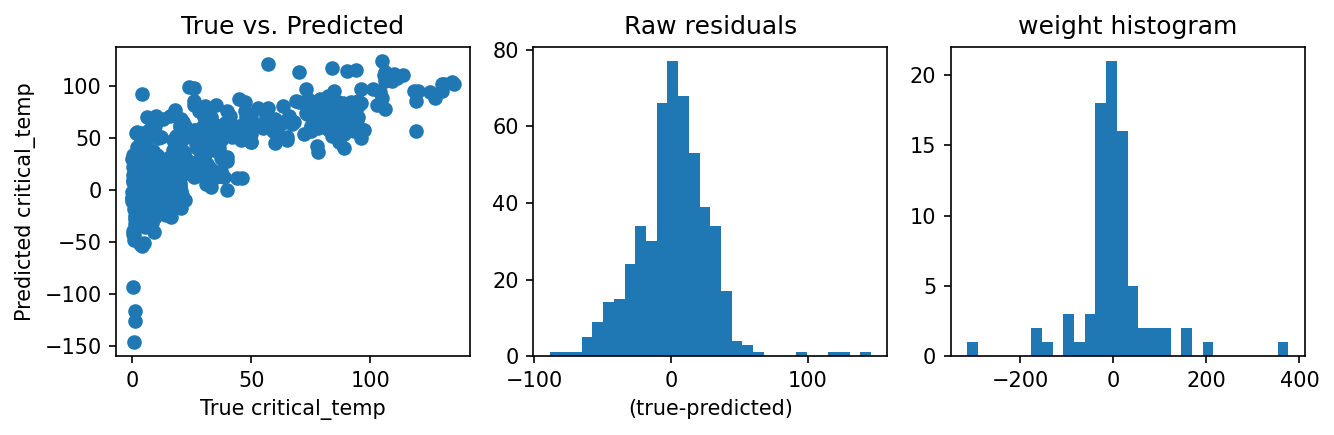

In [68]:
weights, y_pred = sklearn_regression(X_test, X_train, y_train)
plot_regression_results(y_test, y_pred, weights)

If you implemented everything correctly, the MSE is again 707.8.

Fit the model using the larger training set, `X_train_full` and `y_train_full`, and again evaluate on `X_test`.

score:  0.7372191907488742
MSE:  340.87282138814834
r^2:  0.7278546934719092


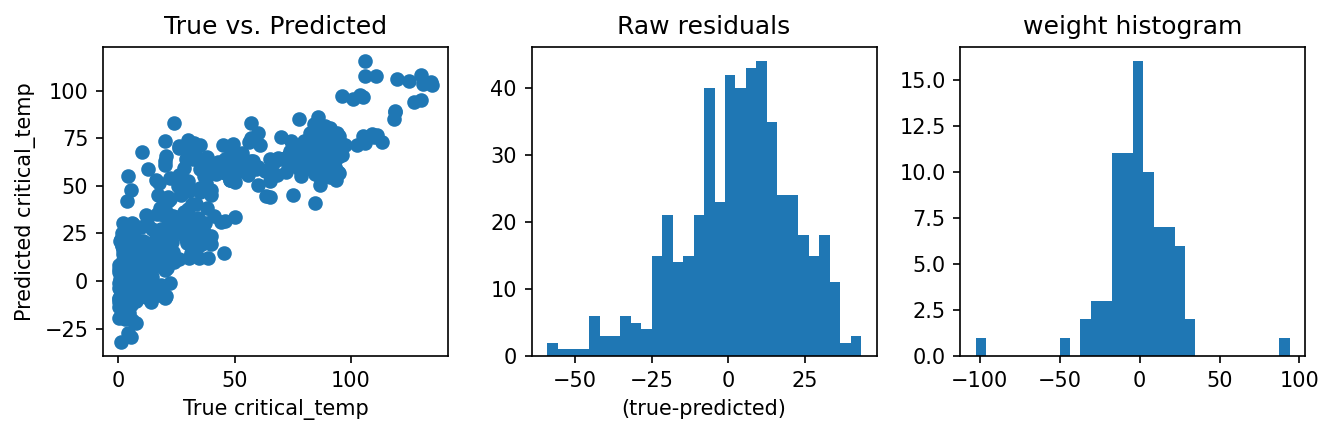

In [69]:
weights, y_pred = sklearn_regression(X_test, X_train_full, y_train_full)
plot_regression_results(y_test, y_pred, weights)

 How does test set performance change? What else changes?

The MSE halfs and the ture vs predicted plot is much more dense around the normal axis. 

## Task 4: Regularization with ridge regression

We will now explore how a penalty term on the weights can improve the prediction quality for finite data sets. Implement the analytical solution of ridge regression 

$w = (X^TX + \alpha I_D)^{-1}X^Ty$


as a function that can take different values of $\alpha$, the regularization strength, as an input. In the lecture, this parameter was called $\lambda$, but this is a reserved keyword in Python.

In [70]:
def ridge_regression(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha
       on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regression model including the offset
         y_pred: The predictions on the TEST set

       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.
    '''

    # ---------------- INSERT CODE ----------------------
    # Offset ones
    X_train = np.append(X_train, np.ones((X_train.shape[0],1)), axis=1)
    X_test = np.append(X_test, np.ones((X_test.shape[0],1)), axis=1)
    # Weight Calculation
    first_part = np.dot(X_train.transpose(), X_train)
    weights = np.dot(np.linalg.inv(first_part+alpha*np.identity(first_part.shape[0])) , np.dot(X_train.transpose(),y_train))

    y_pred = np.dot(X_test, weights)
    

    # ---------------- END CODE -------------------------

    return weights, y_pred

Run the ridge regression on `X_train` with an alpha value of 10 and plot the obtained weights.

MSE:  428.09796358695814
r^2:  0.658216072933074


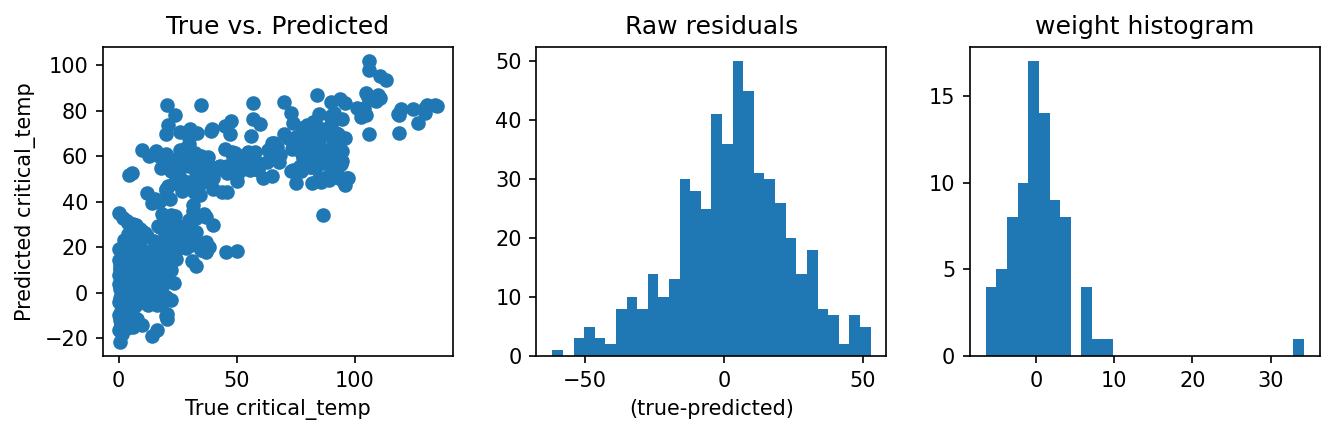

In [71]:
# Run ridge regression with alpha=10
weights, y_pred = ridge_regression(X_test, X_train, y_train, alpha=10)

# Plot regression results
plot_regression_results(y_test, y_pred, weights)

Now test a range of log-spaced $\alpha$s (~10-20), which cover several orders of magnitude, e.g. from 10^-7 to 10^7. 

* For each $\alpha$, you will get one model with one set of weights. 
* For each model, compute the error on the test set. 

Store both the errors and weights of all models for later use. You can use the function `mean_squared_error` from sklearn (imported above) to compute the MSE.


In [72]:
alphas = np.logspace(-7, 7, 100)
weights_per_alpha = []
mse_per_alpha = []
# ---------------- INSERT CODE ----------------------
for alpha in alphas:
    weights, y_pred = ridge_regression(X_test, X_train, y_train, alpha)
    mse = mean_squared_error(y_test, y_pred)
    mse_per_alpha.append(mse)
    weights_per_alpha.append(weights)
# ---------------- END CODE -------------------------

Make a single plot that shows for each coefficient how it changes with $\alpha$, i.e. one line per coefficient. Also think about which scale is appropriate for your $\alpha$-axis. You can set this using `plt.xscale(...)`.

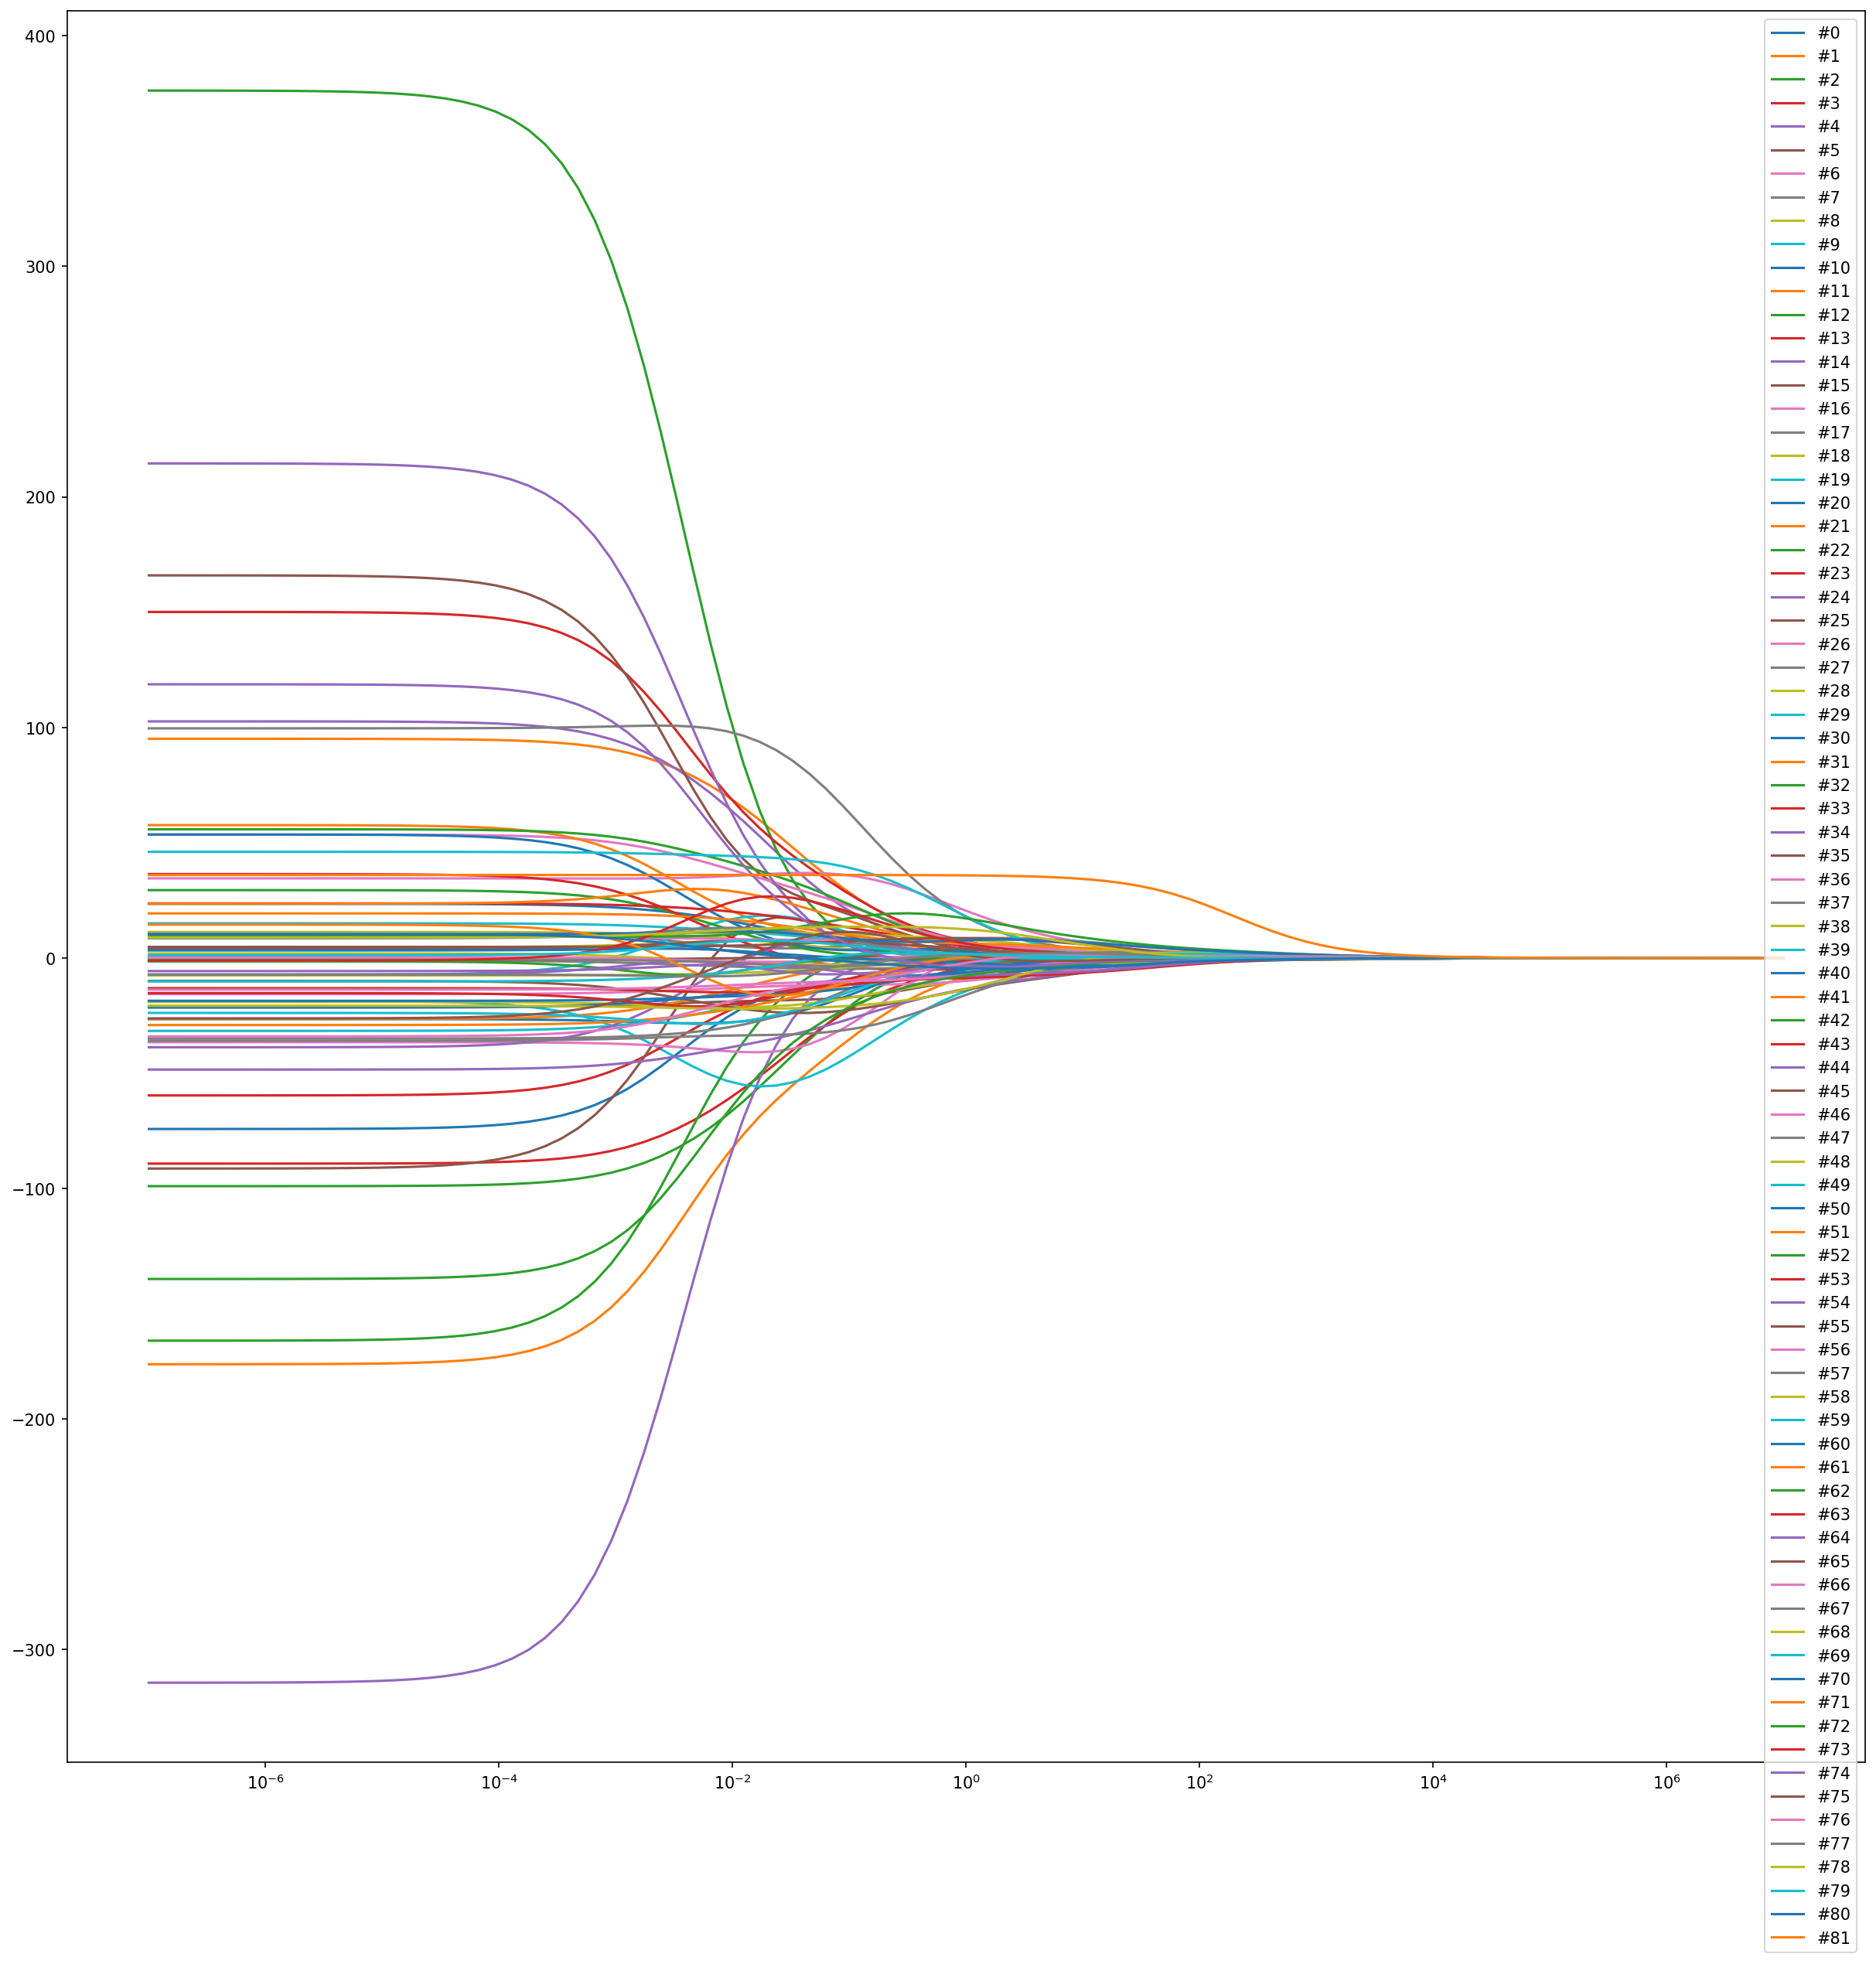

In [73]:
# Plot of coefficients vs. alphas
weight_per_alpha = np.array(weights_per_alpha)

for i in range(weight_per_alpha.shape[1]):
    one_coeff_dev = weight_per_alpha[:,i,:]
    plt.plot(alphas,one_coeff_dev, label=f"#{i}")

plt.xscale('log')
plt.legend()
plt.show()


Why are the values of the weights largest on the left? Do they all change monotonically? 

Largest on the left, because alpha contributes over an inverse, so if alpha is really small the resulting weights will get big. Not all coeffs change monotonically eg. brown line starting at -70, negative climbs up to around 30 and then to zero. 

Plot how the performance (i.e. the error) changes as a function of $\alpha$. As a sanity check, the MSE value for very small $\alpha$ should be close to the test-set MSE of the unregularized solution, i.e. 708.

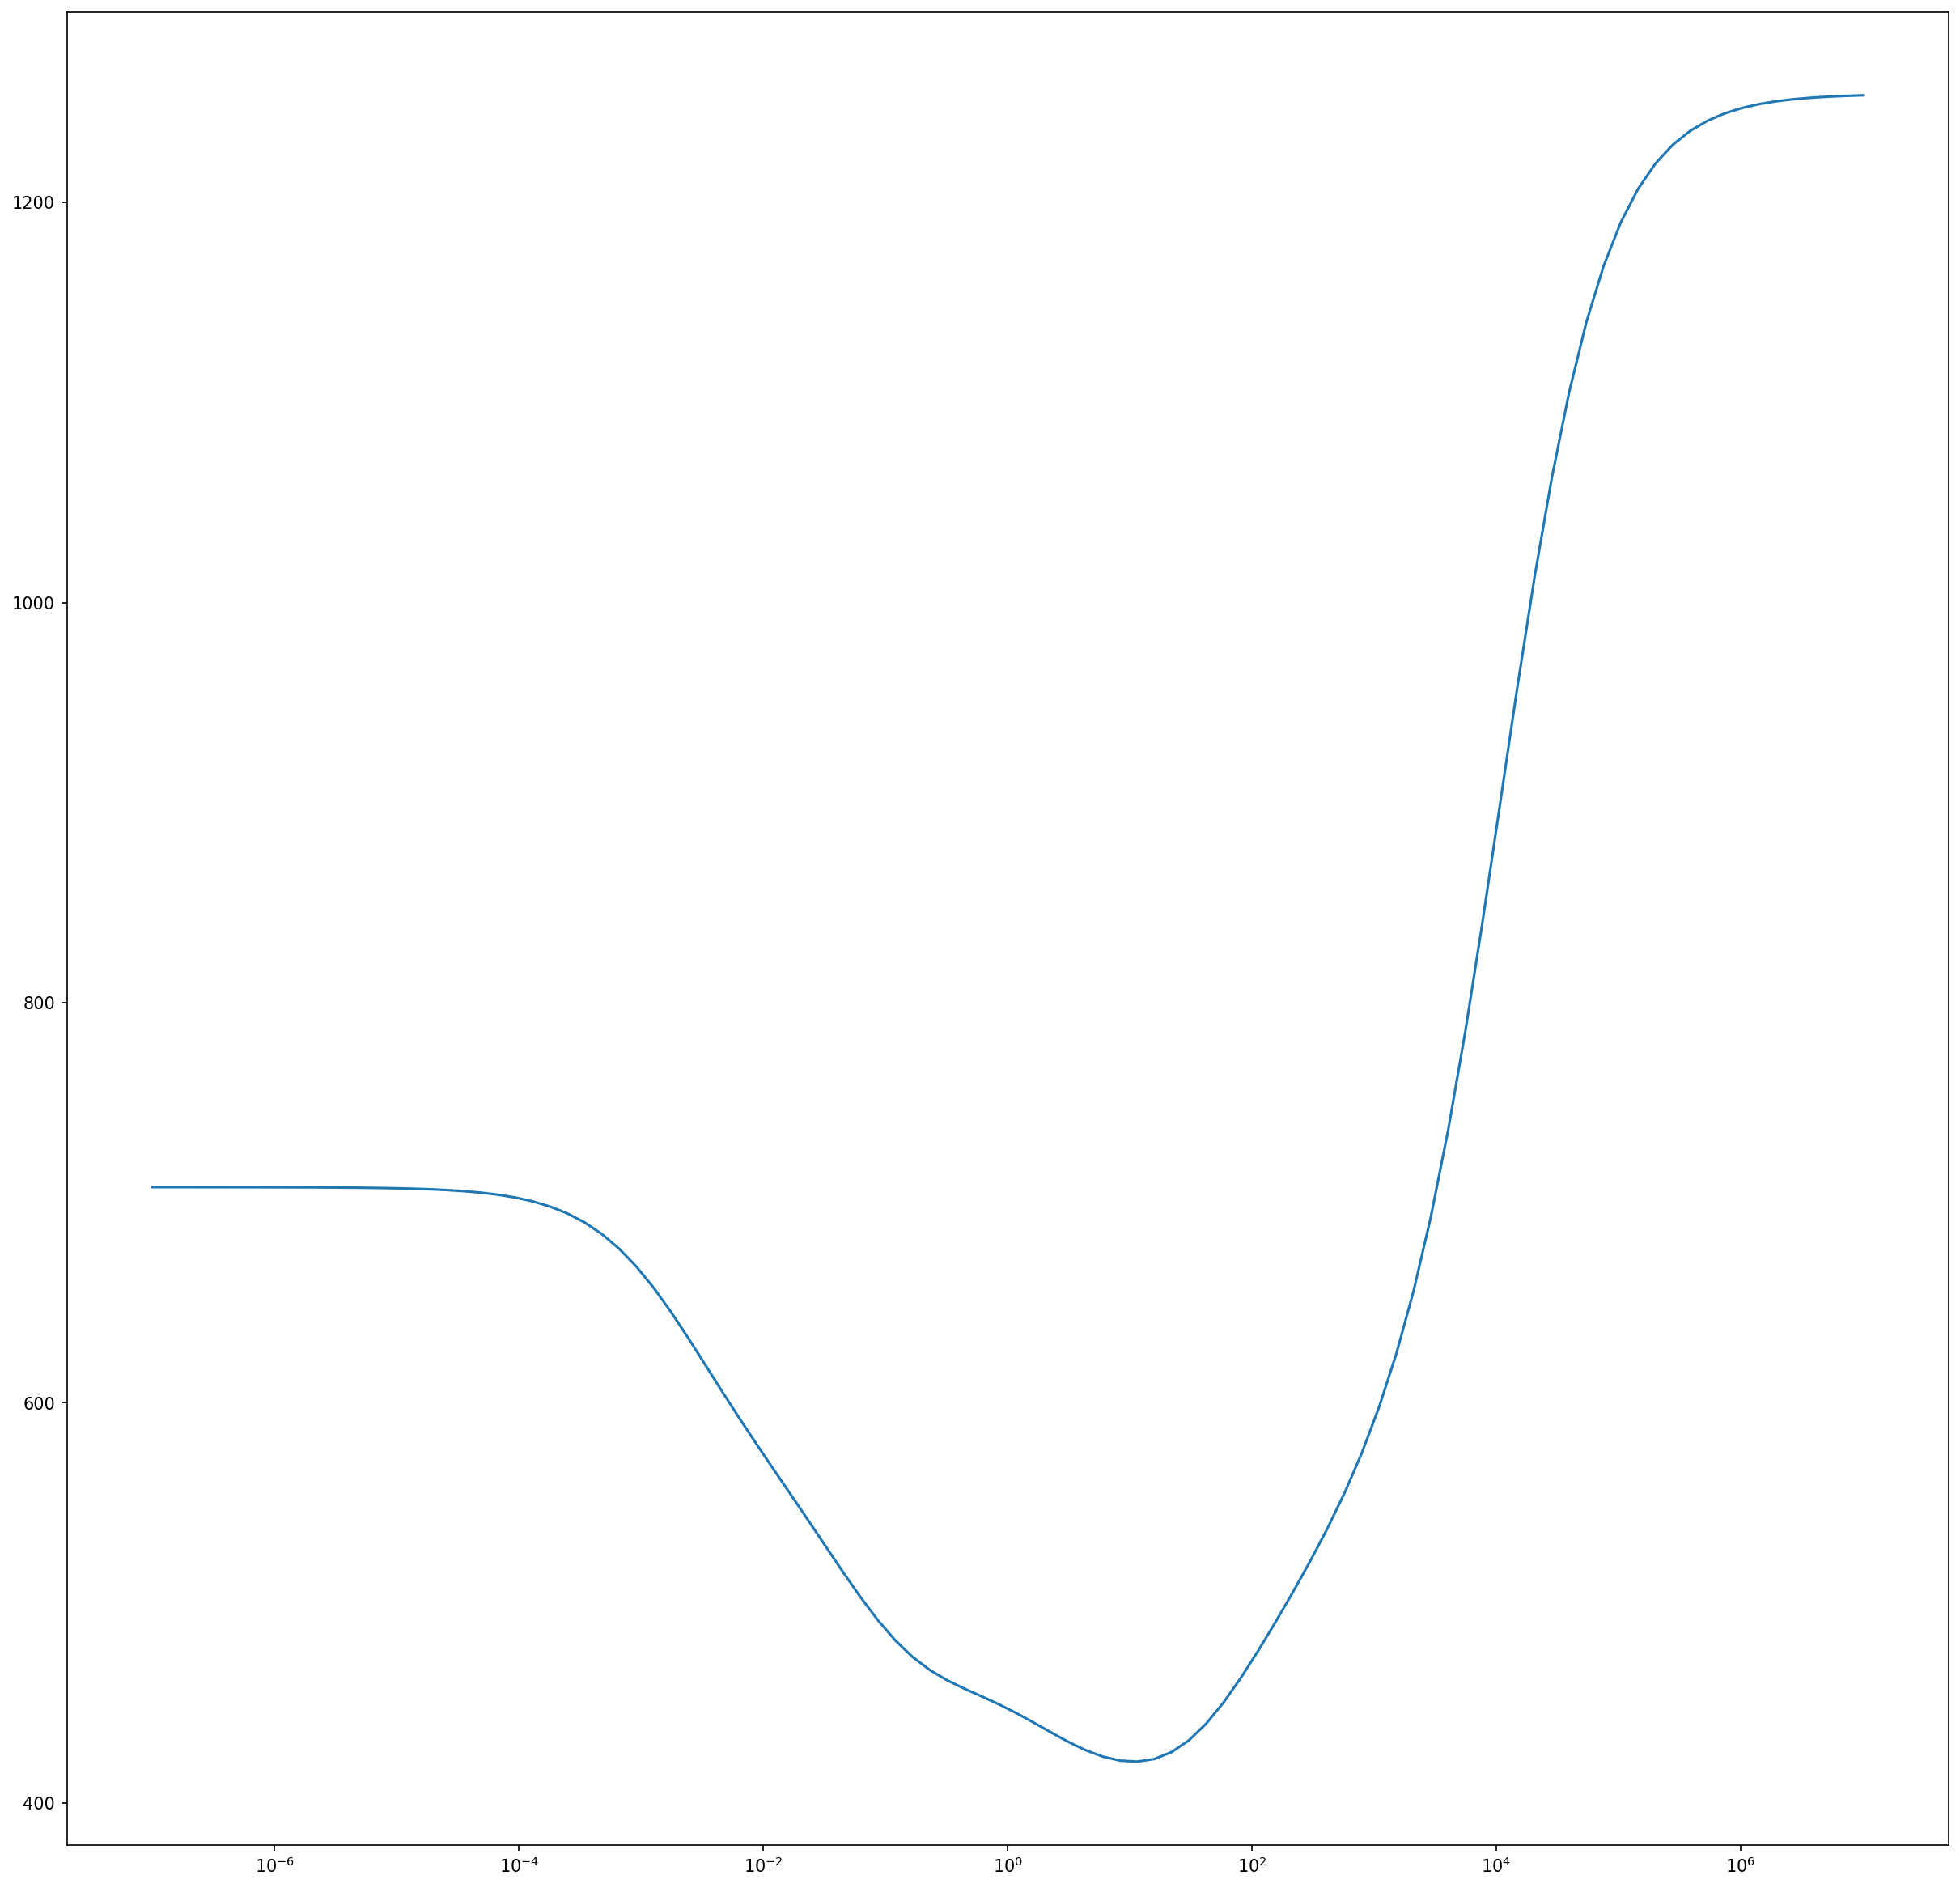

Min alpha:  11.497569953977356  with MSE value:  420.64237901673766


In [87]:
# Plot of MSE  vs. alphas
mse_per_alpha = np.array(mse_per_alpha)

plt.plot(alphas,mse_per_alpha)
plt.xscale('log')
plt.show()

min_index = np.where(mse_per_alpha == mse_per_alpha.min())[0][0]
print("Min alpha: " ,alphas[min_index], " with MSE value: ", mse_per_alpha.min())

Which value of $\alpha$ gives the minimum MSE? Is it better than the unregularized model? Why should the curve reach ~700 on the left?

For $$ \alpha \approx 11.5 $$  is the minimum MSE of 420 . This is a better than the unregularized model with a MSE OF 707. This is the value for the far left, because if alpha is really small it does not contribute as much to the final result.

Now implement the same model using sklearn. Use the `linear_model.Ridge` object to do so.


In [75]:
def ridge_regression_sklearn(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha using the sklearn
       library on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set

       Note:
         The sklearn library automatically takes care of adding a column for the offset.
    '''

    # ---------------- INSERT CODE ----------------------
    reg = linear_model.Ridge(alpha).fit(X_train,y_train) 
    weights = reg.get_params()
    y_pred = reg.predict(X_test)

    # ---------------- END CODE -------------------------

    return weights, y_pred

This time, only plot how the performance changes as a function of $\alpha$. 

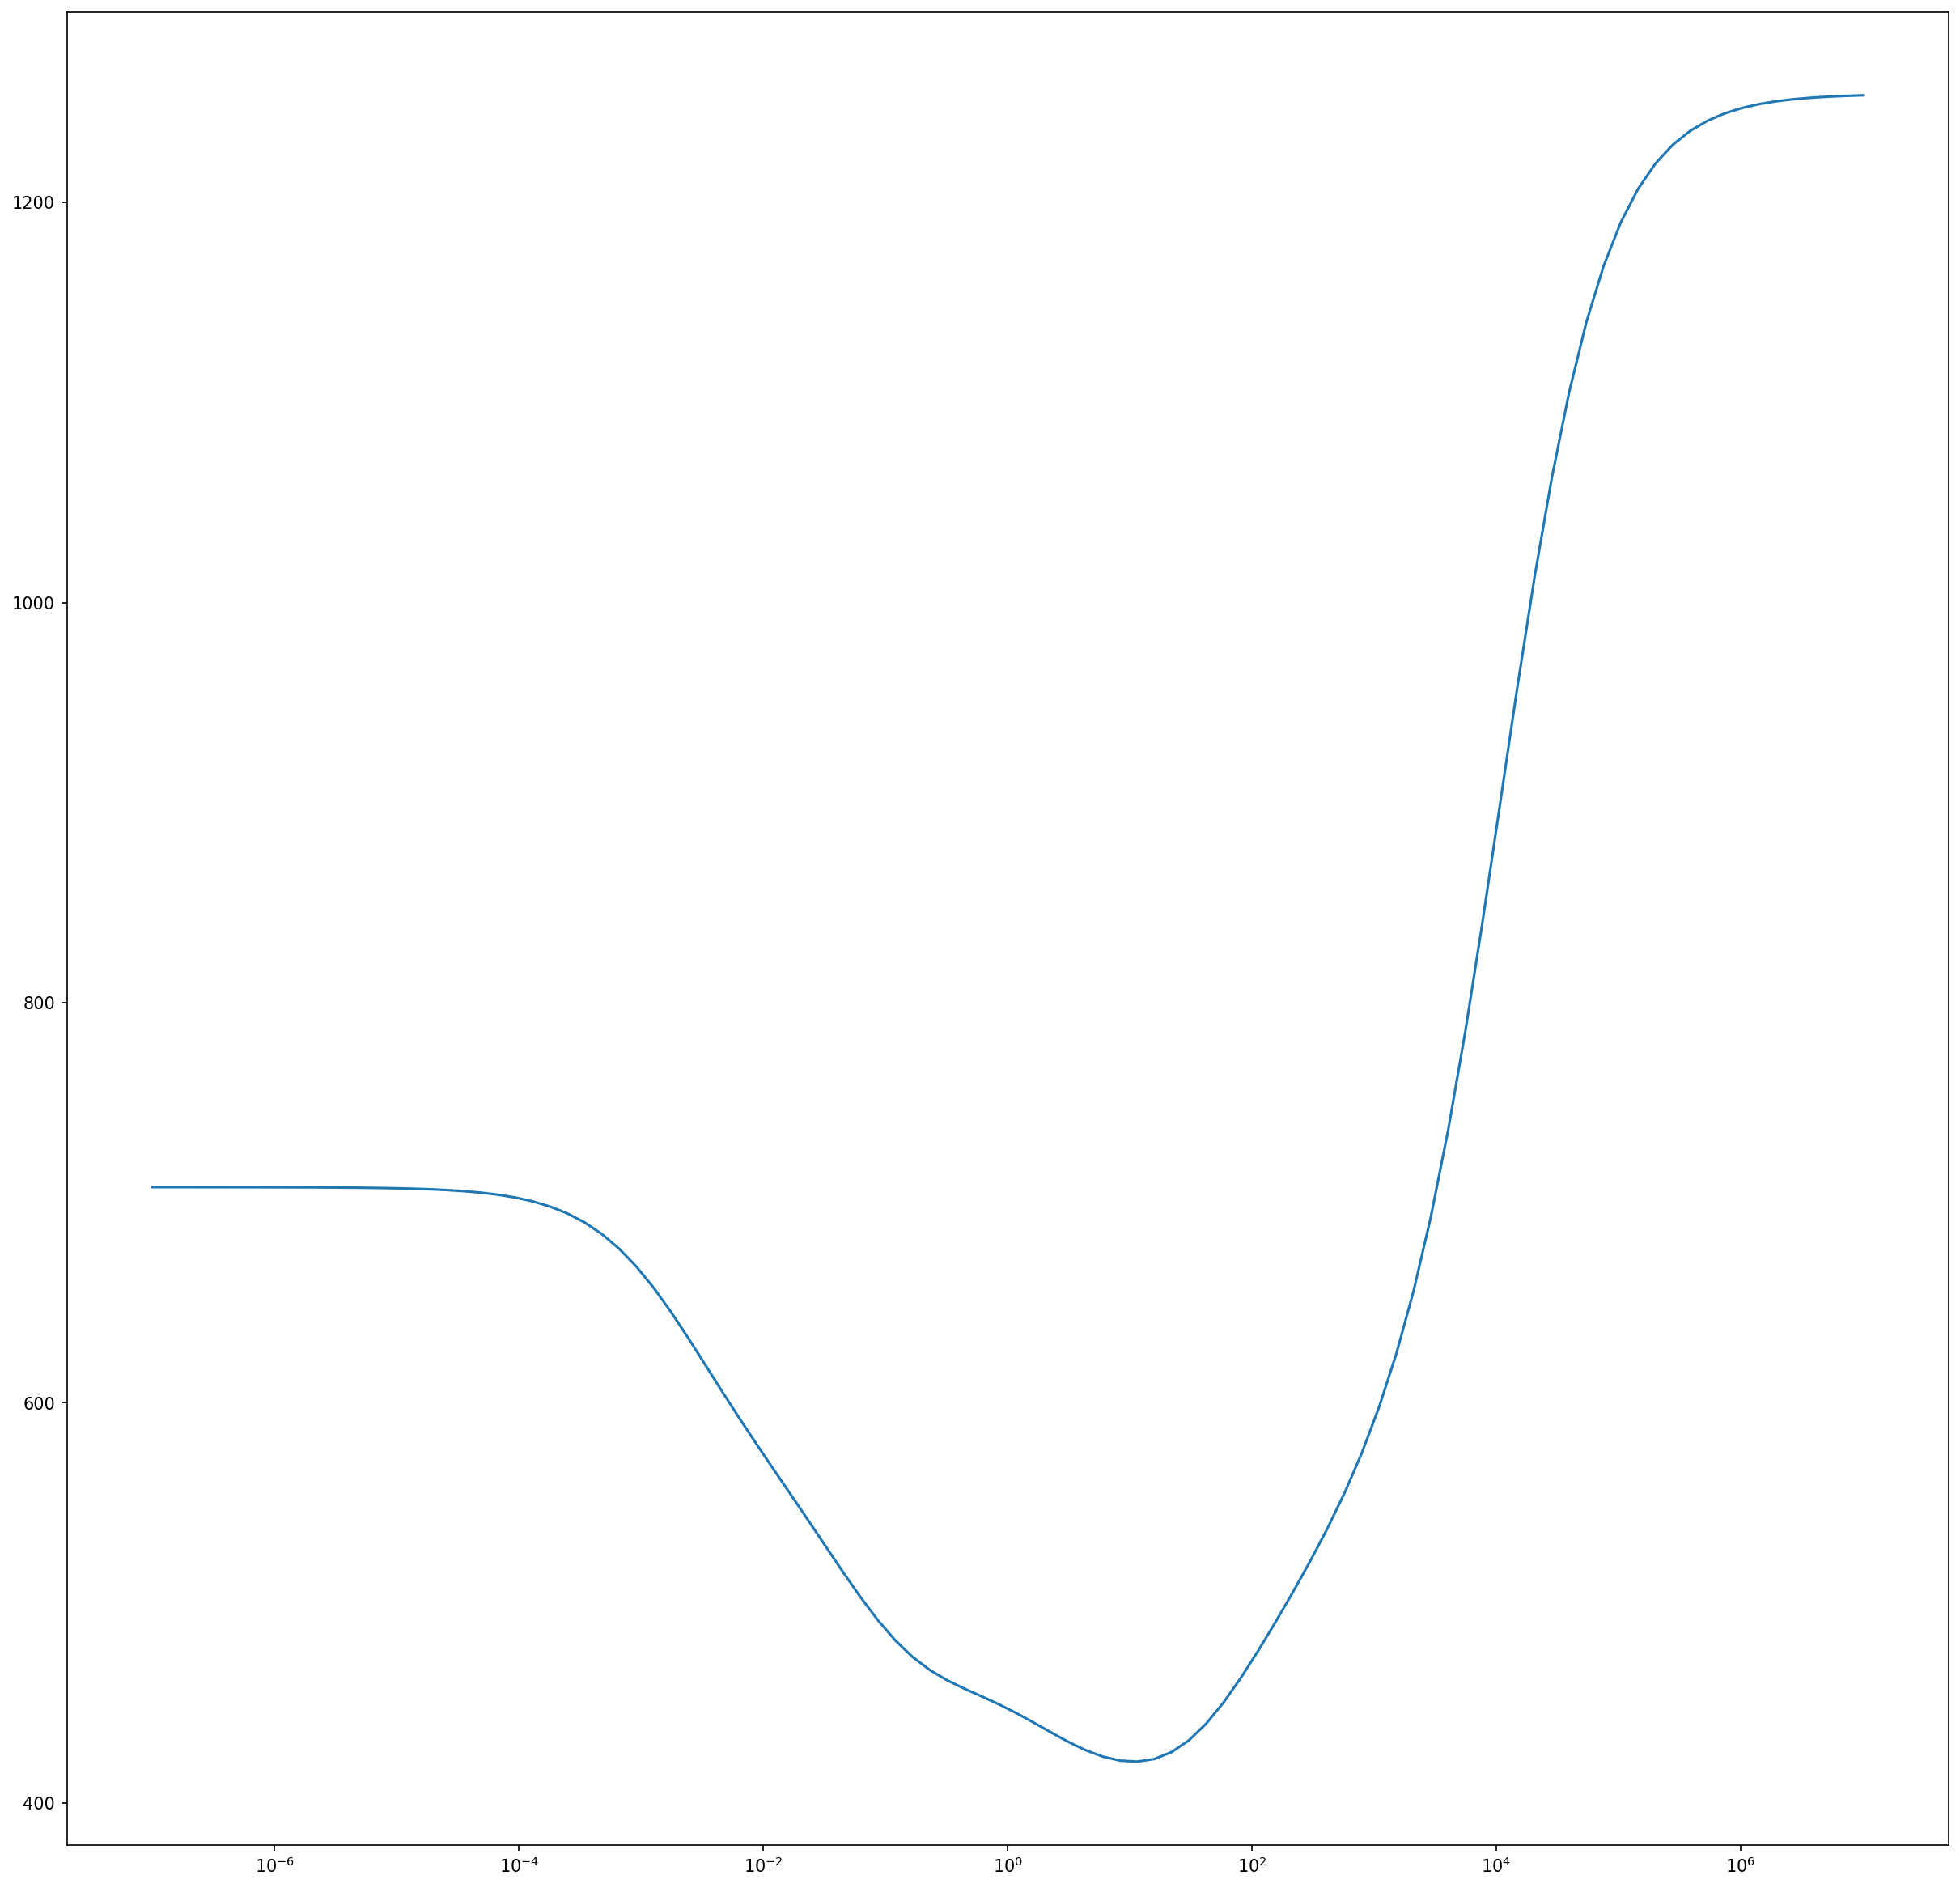

Min alpha:  11.497569953977356  with MSE value:  420.64237901673766


In [76]:
# Plot of MSE  vs. alphas
mse_per_alpha = []

for alpha in alphas:
    weights, y_pred = ridge_regression_sklearn(X_test, X_train, y_train, alpha)
    mse = mean_squared_error(y_test, y_pred)
    mse_per_alpha.append(mse)

mse_per_alpha = np.array(mse_per_alpha)

plt.plot(alphas,mse_per_alpha)
plt.xscale('log')
plt.show()

min_index = np.where(mse_per_alpha == mse_per_alpha.min())[0][0]
print("Min alpha: " ,alphas[min_index], " with MSE value: ", mse_per_alpha.min())

Note: Don't worry if the curve is not exactly identical to the one you got above. The loss function we wrote down in the lecture  has $\alpha$ defined a bit differently compared to sklearn. However, qualitatively it should look the same.

## Task 5: Cross-validation

Until now, we always estimated the error on the test set directly. However, we typically do not want to tune hyperparameters of our inference algorithms like $\alpha$ on the test set, as this may lead to overfitting. Therefore, we tune them on the training set using cross-validation. As discussed in the lecture, the training data is here split in `n_folds`-ways, where each of the folds serves as a held-out dataset in turn and the model is always trained on the remaining data. Implement a function that performs cross-validation for the ridge regression parameter $\alpha$. You can reuse functions written above.

In [77]:
def ridgeCV(X, y, n_folds, alphas):
    '''Runs a n_fold-crossvalidation over the ridge regression parameter alpha.
       The function should train the linear regression model for each fold on all values of alpha.

      Inputs:
        X: (n_obs, n_features) numpy array - predictor
        y: (n_obs,) numpy array - target
        n_folds: integer - number of CV folds
        alphas: (n_parameters,) - regularization strength parameters to CV over

      Outputs:
        cv_results_mse: (n_folds, len(alphas)) numpy array, MSE for each cross-validation fold

      Note:
        Fix the seed for reproducibility.
    '''

    cv_results_mse = np.zeros((n_folds, len(alphas)))
    np.random.seed(seed=2)
    # ---------------- INSERT CODE ----------------------
    size_of_one_partition = int(X[:,0].size/n_folds)
    for i in range(n_folds-1):
      first_border = i*size_of_one_partition
      end_border = i*size_of_one_partition+size_of_one_partition
      X_test = X[first_border:end_border,:]
      X_train = X[np.r_[0:first_border,end_border:X[:,0].size],:]
      y_train = y[np.r_[0:first_border,end_border:X[:,0].size],:]
      for j,alpha in enumerate(alphas):
        weights, y_pred = ridge_regression(X_test,X_train,y_train,alpha)
        mse = mean_squared_error(y[first_border:end_border,:],y_pred)
        cv_results_mse[i,j] = mse


    # ---------------- END CODE -------------------------

    return cv_results_mse

Now we run 10-fold cross-validation using the training data of a range of $\alpha$s.

In [78]:
alphas = np.logspace(-7, 7, 100)
mse_cv = ridgeCV(X_train, y_train, n_folds=10, alphas=alphas)

We plot the MSE trace for each fold separately:

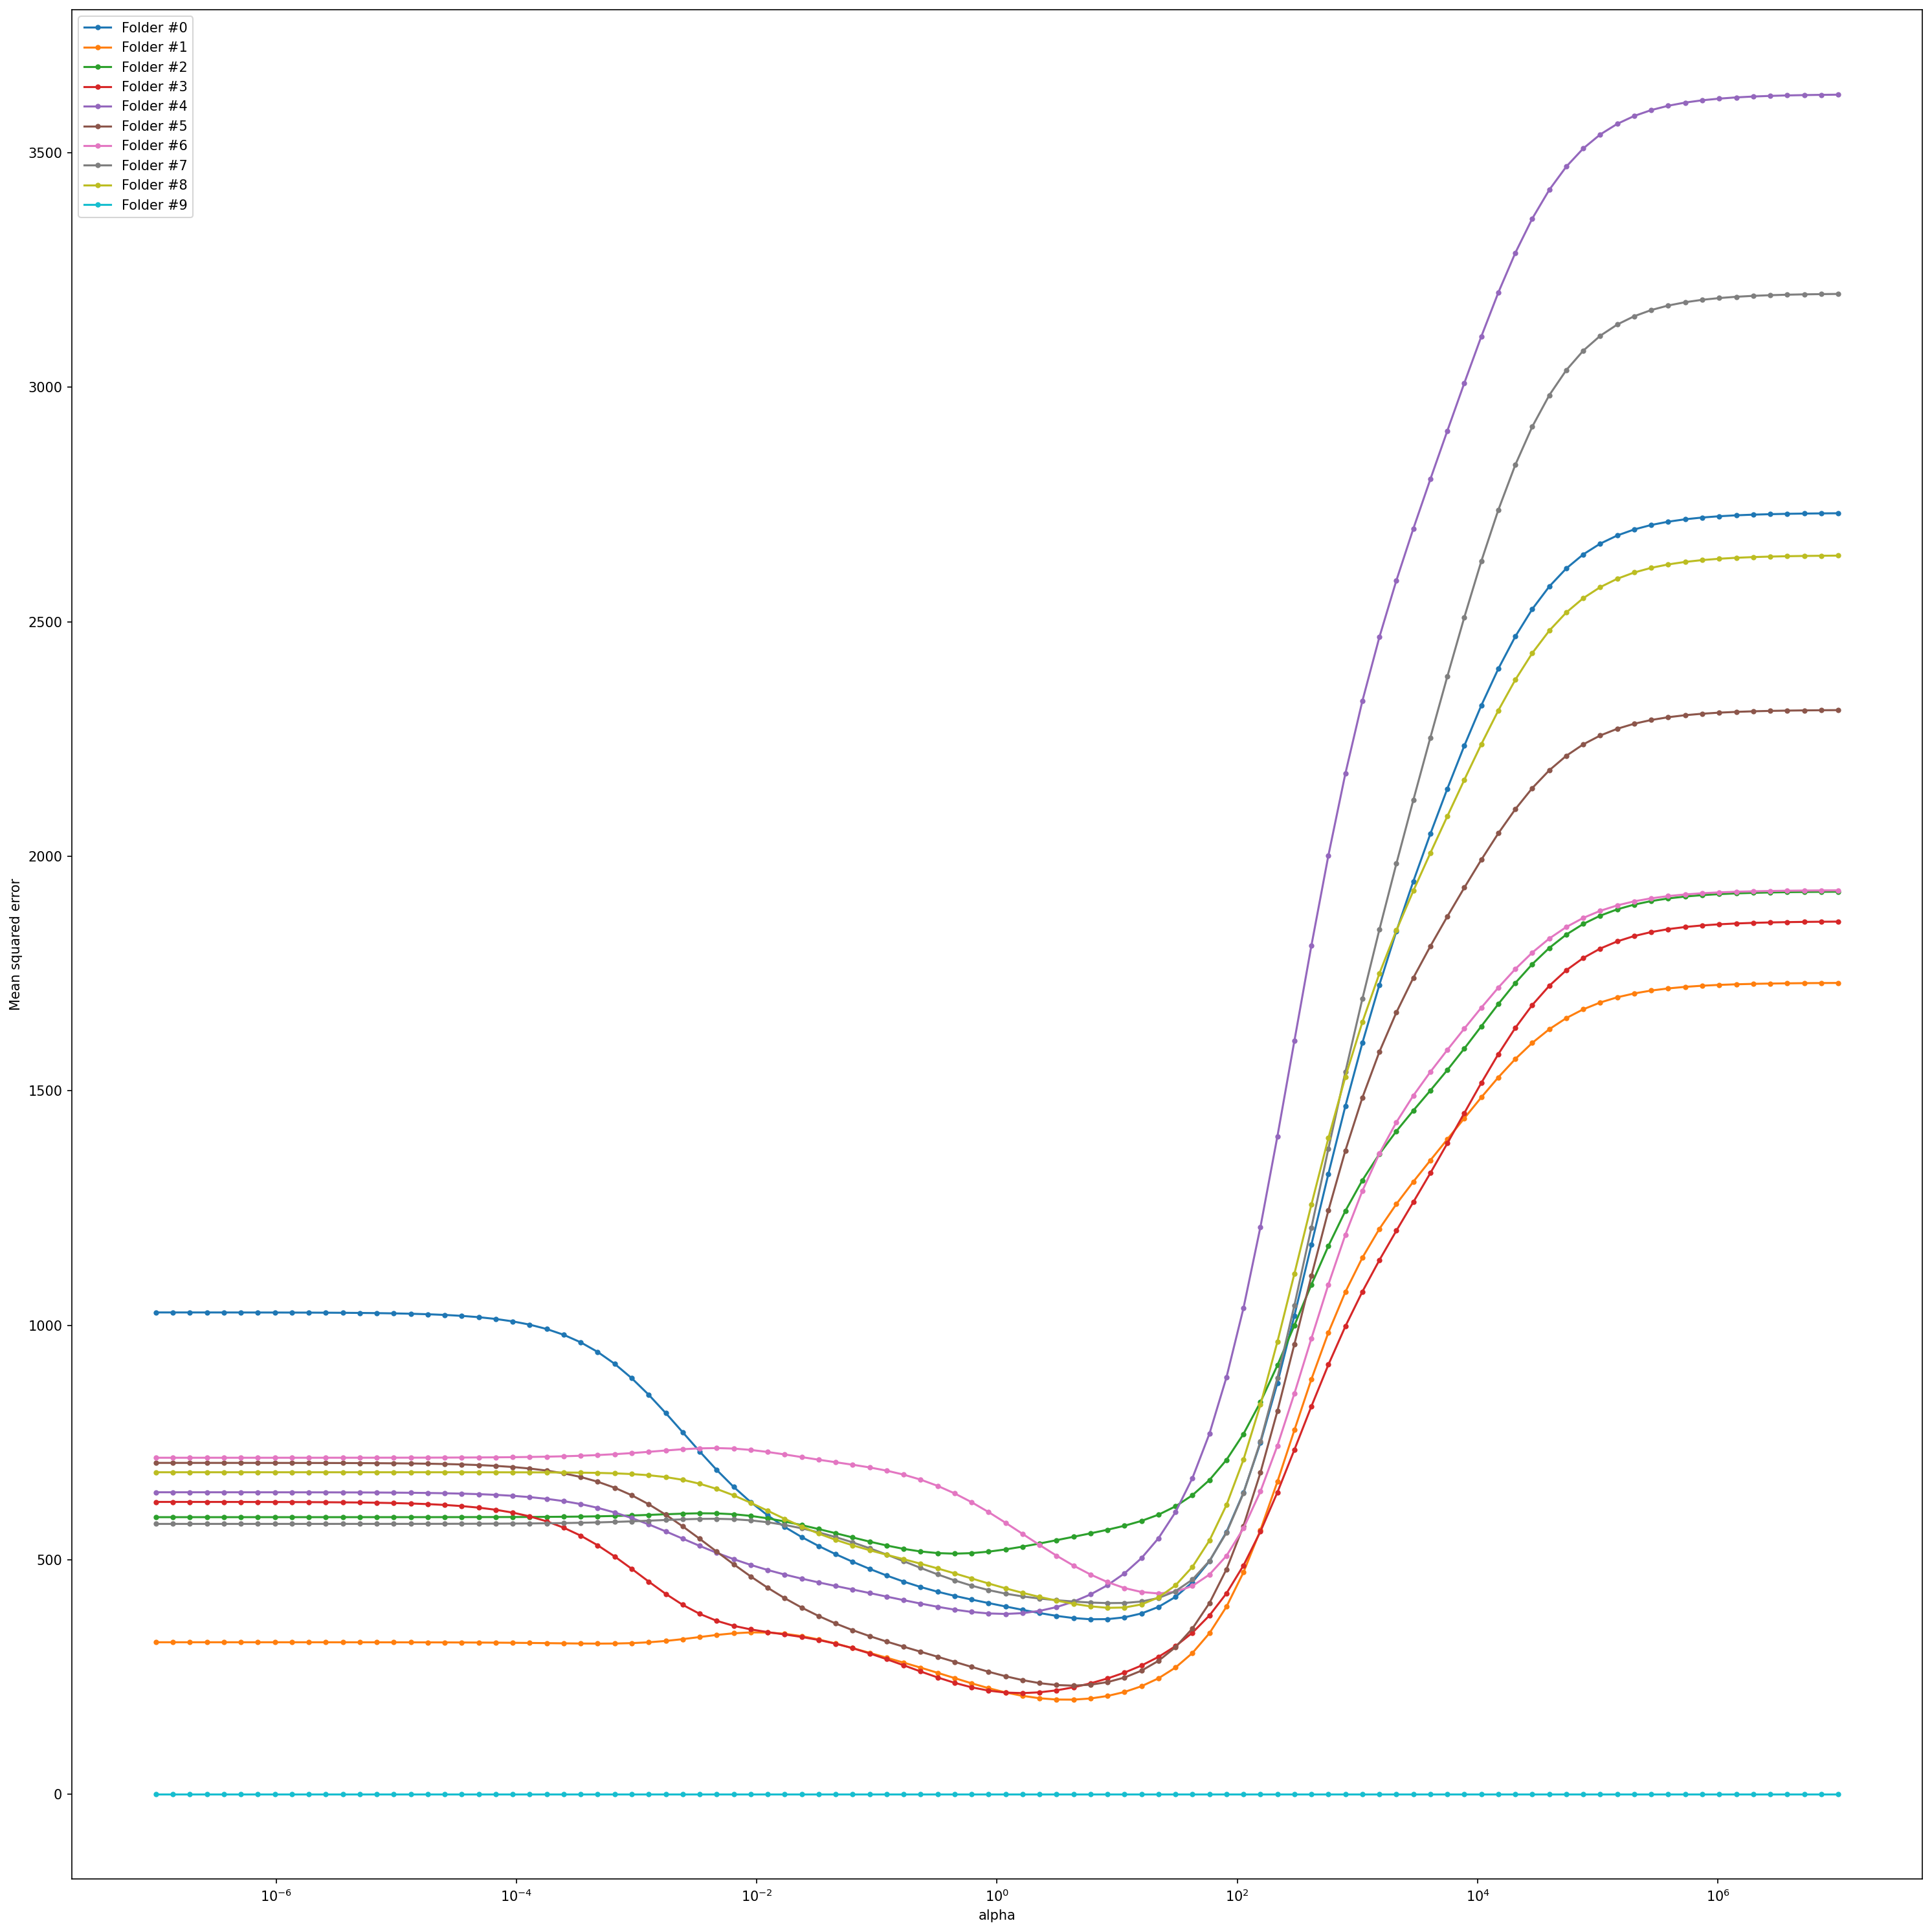

In [79]:
for i in range(10):
    plt.plot(alphas, mse_cv[i], '.-', label=f"Folder #{i}")
plt.xscale('log')
plt.xlabel('alpha')
plt.legend()
plt.ylabel('Mean squared error')
plt.tight_layout()

We also plot the average across folds:

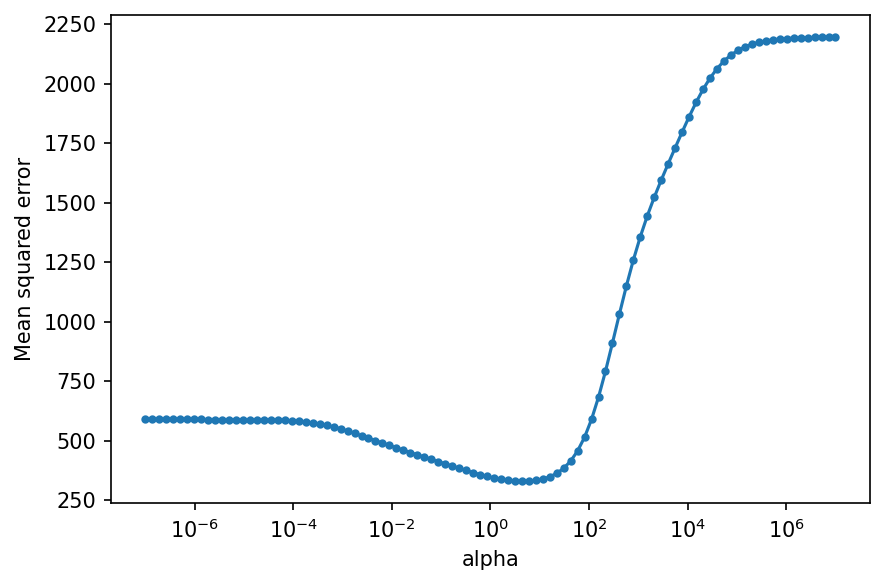

In [80]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

What is the optimal $\alpha$? Is it similar to the one found on the test set? Do the cross-validation MSE and the test-set MSE match well or differ strongly?

In [81]:
min_mse = np.mean(mse_cv, axis=0).min()
print("min MSE: ",min_mse)
min_index = np.where(np.mean(mse_cv, axis=0) == min_mse)[0][0]
print(min_index)
print("opt alpha: ", alphas[min_index])

min MSE:  330.15594940547516
54
opt alpha:  4.328761281083053


The minimum alpha is a bit smaller and the MSE shrank again about 100 -> The gerneral form of the graph is very similar to the one on the test set, but dips a bit deeper at optimal alpha.

We will now run cross-validation on the full training data. This will take a moment, depending on the speed of your computer. Afterwards, we will again plot the mean CV curves for the full data set (blue) and the small data set (orange).

In [82]:
alphas = np.logspace(-7, 7, 100)
mse_cv_full = ridgeCV(X_train_full, y_train_full, n_folds=10, alphas=alphas)

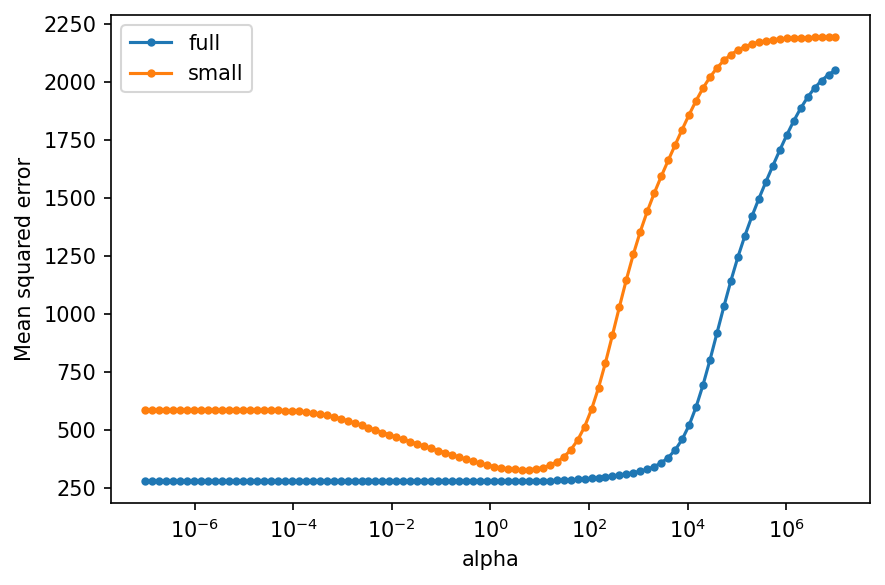

In [83]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-', label='full')
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-', label='small')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.legend()
plt.tight_layout()

We zoom in on the blue curve to the very left:

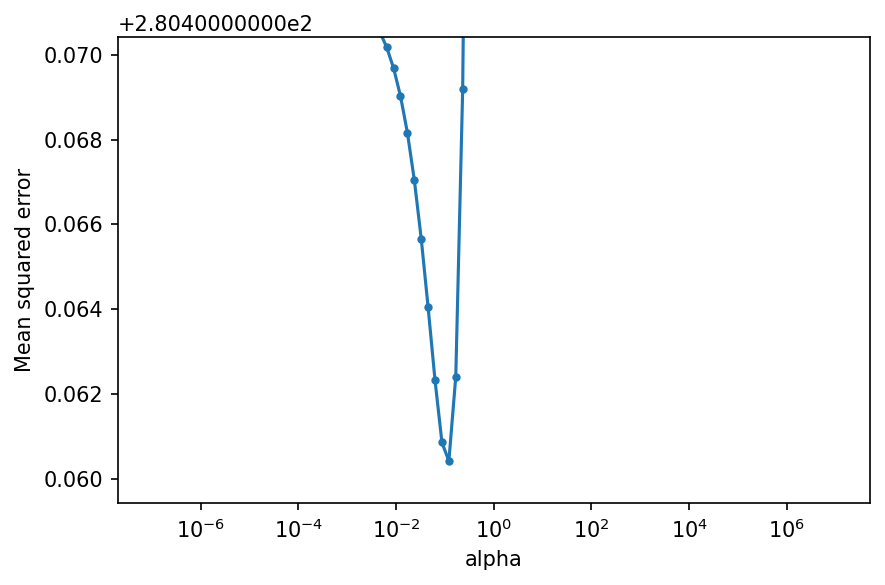

In [84]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv_full, axis=0), '.-')
plt.xscale('log')
minValue = np.min(np.mean(mse_cv_full, axis=0))
plt.ylim([minValue-.001, minValue+.01])
#plt.xlim([10e-3,1])
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

Why does the CV curve on the full data set look so different? What is the optimal value of $\alpha$ and why is it so much smaller than on the small training set?

In [85]:
print("MSE min: ", minValue)
min_alpha = alphas[np.where(np.mean(mse_cv_full, axis=0) == minValue)[0][0]]
print("Alpha opt: ", min_alpha)

MSE min:  280.46041464592184
Alpha opt:  0.12045035402587811


It is much smaler, because when we take all data into account, a small alpha conrtibutes more. Hence the model is much surer about which alpha to chose.